# Introduction

> To design and compare a Fully Connected Neural Network (FCNN), Convolutional Neural Network (CNN), and Quantum Convolutional Neural Network (QCNN) for waste classification using the TrashNet dataset, which consists of images of various waste categories such as glass, paper, plastic, metal, cardboard, and trash.

## Objectives

- Develop a FCNN, CNN, and QCNN for waste classification using the TrashNet dataset.

- Evaluate and compare the performance of each model on various metrics.

- Investigate the impact of quantum-inspired approaches on waste classification by implementing a QCNN and exploring its performance relative to classical models.

- Assess the feasibility of quantum machine learning in environmental applications, particularly in waste management, and understand the advantages and limitations of QCNNs in this context.


## 1. Import necessary libraries

In [2]:
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from datasets import load_dataset

## 2. Load the TrashNet dataset

In [17]:
ds = load_dataset("garythung/trashnet")
print(ds)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 5054
    })
})


## 3. Image and label preprocessing

In [18]:
def preprocess(example):
    image = tf.image.resize(example['image'], (64, 64))
    image = tf.image.convert_image_dtype(image, tf.float32)
    label = example['label']
    return {"image": image, "label": label}

processed_ds = ds['train'].map(preprocess)

In [19]:
# Convert to a TensorFlow dataset
train_ds = processed_ds.to_tf_dataset(
    columns=['image'],  # Features to include
    label_cols='label',  # Labels
    shuffle=True,
    batch_size=32
)

# Apply prefetching
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:403: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


## 4. Model Architectures

### 4.1 Fully Connected Neural Network Model

In [20]:
fcnn_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')])

SyntaxError: incomplete input (<ipython-input-20-c319a0c23d7c>, line 6)

In [21]:
fcnn_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [22]:
fcnn_history = fcnn_model.fit(train_ds, epochs=40)

Epoch 1/40
158/158 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.2131 - loss: 43.4879
Epoch 2/40
158/158 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.3047 - loss: 2.6118
Epoch 3/40
158/158 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.3042 - loss: 1.9175
Epoch 4/40
158/158 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.2624 - loss: 2.9952
Epoch 5/40
158/158 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.2710 - loss: 3.0685
Epoch 6/40
 78/158 ━━━━━━━━━━━━━━━━━━━━ 1:33 1s/step - accuracy: 0.1996 - loss: 1.7785

KeyboardInterrupt: 

## 5.  Evaluate and Compare Models

In [14]:
# Evaluate the FCNN model
fcnn_eval = fcnn_model.evaluate(train_ds)
print("FCNN Evaluation:", fcnn_eval)

158/158 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.3176 - loss: 5.2519
FCNN Evaluation: [5.381109237670898, 0.31282153725624084]


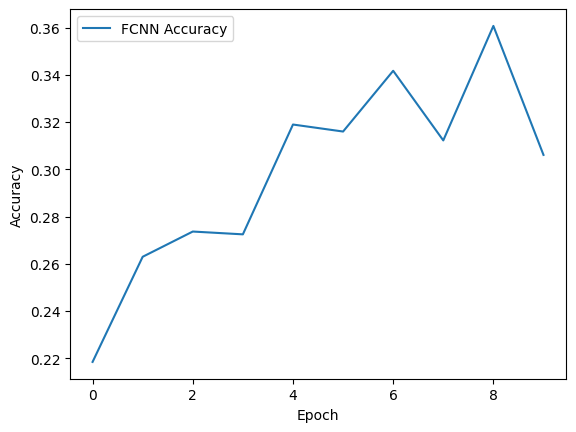

In [16]:
import matplotlib.pyplot as plt

plt.plot(fcnn_history.history['accuracy'], label='FCNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()